In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("C:\\Users\\gunad\\Downloads\\project Data set.csv")


In [3]:
data.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [4]:
data.shape

(8784, 8)

In [5]:
data.columns

Index(['Date/Time', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather'],
      dtype='object')

In [6]:
data.dtypes

Date/Time            object
Temp_C              float64
Dew Point Temp_C    float64
Rel Hum_%             int64
Wind Speed_km/h       int64
Visibility_km       float64
Press_kPa           float64
Weather              object
dtype: object

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


In [8]:
data.Weather.value_counts()

Weather
Mainly Clear                               2106
Mostly Cloudy                              2069
Cloudy                                     1728
Clear                                      1326
Snow                                        390
Rain                                        306
Rain Showers                                188
Fog                                         150
Rain,Fog                                    116
Drizzle,Fog                                  80
Snow Showers                                 60
Drizzle                                      41
Snow,Fog                                     37
Snow,Blowing Snow                            19
Rain,Snow                                    18
Thunderstorms,Rain Showers                   16
Haze                                         16
Drizzle,Snow,Fog                             15
Freezing Rain                                14
Freezing Drizzle,Snow                        11
Freezing Drizzle                

In [9]:
data.Weather.unique()

array(['Fog', 'Freezing Drizzle,Fog', 'Mostly Cloudy', 'Cloudy', 'Rain',
       'Rain Showers', 'Mainly Clear', 'Snow Showers', 'Snow', 'Clear',
       'Freezing Rain,Fog', 'Freezing Rain', 'Freezing Drizzle',
       'Rain,Snow', 'Moderate Snow', 'Freezing Drizzle,Snow',
       'Freezing Rain,Snow Grains', 'Snow,Blowing Snow', 'Freezing Fog',
       'Haze', 'Rain,Fog', 'Drizzle,Fog', 'Drizzle',
       'Freezing Drizzle,Haze', 'Freezing Rain,Haze', 'Snow,Haze',
       'Snow,Fog', 'Snow,Ice Pellets', 'Rain,Haze', 'Thunderstorms,Rain',
       'Thunderstorms,Rain Showers', 'Thunderstorms,Heavy Rain Showers',
       'Thunderstorms,Rain Showers,Fog', 'Thunderstorms',
       'Thunderstorms,Rain,Fog',
       'Thunderstorms,Moderate Rain Showers,Fog', 'Rain Showers,Fog',
       'Rain Showers,Snow Showers', 'Snow Pellets', 'Rain,Snow,Fog',
       'Moderate Rain,Fog', 'Freezing Rain,Ice Pellets,Fog',
       'Drizzle,Ice Pellets,Fog', 'Drizzle,Snow', 'Rain,Ice Pellets',
       'Drizzle,Snow,Fog', 

In [10]:
data.Weather.nunique

<bound method IndexOpsMixin.nunique of 0                        Fog
1                        Fog
2       Freezing Drizzle,Fog
3       Freezing Drizzle,Fog
4                        Fog
                ...         
8779                    Snow
8780                    Snow
8781                    Snow
8782                    Snow
8783                    Snow
Name: Weather, Length: 8784, dtype: object>

In [11]:
x='Thunderstorms,Moderate Rain Showers,Fog'

In [12]:
list_of_lists=[w.split() for w in x.split(',')]
list_of_lists

[['Thunderstorms'], ['Moderate', 'Rain', 'Showers'], ['Fog']]

In [13]:
from itertools import chain
flat_list=list(chain(*list_of_lists))
flat_list

['Thunderstorms', 'Moderate', 'Rain', 'Showers', 'Fog']

In [15]:
def Create_list(x):
    list_of_lists=[w.split() for w in x.split(',')]
    flat_list=list(chain(*list_of_lists))
    return flat_list


def Get_Weather(list1):
    if 'Fog' in list1 and 'Rain' in list1:
        return 'RAIN+FOG'
    elif 'Snow' in list1 and 'Rain' in list1:
        return 'SNOW+RAIN'
    elif 'Snow' in list1:
        return 'SNOW'
    elif 'Rain' in list1:
        return 'RAIN'
    elif 'Fog' in list1:
        return 'FOG'
    elif 'Clear' in list1:
        return 'Clear'
    elif 'Cloudy' in list1:
        return 'Cloudy' 
    else:
        return 'RAIN'     

In [16]:
Create_list(x)

['Thunderstorms', 'Moderate', 'Rain', 'Showers', 'Fog']

In [17]:
Get_Weather(Create_list(x))

'RAIN+FOG'

In [18]:
data['Std_Weather']=data['Weather'].apply(lambda x: Get_Weather(Create_list(x)))

In [19]:
data.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Std_Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog,FOG
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog,FOG
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",FOG
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog",FOG
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog,FOG


In [20]:
data.Std_Weather.value_counts()

Std_Weather
Cloudy       3797
Clear        3432
RAIN          603
SNOW          556
FOG           241
RAIN+FOG      129
SNOW+RAIN      26
Name: count, dtype: int64

In [21]:
cloudy_df=data[data['Std_Weather']=='Cloudy'].sample(600)
cloudy_df.shape

(600, 9)

In [22]:
clear_df=data[data['Std_Weather']=='Clear'].sample(600)
clear_df.shape

(600, 9)

In [23]:
data.Std_Weather.value_counts()

Std_Weather
Cloudy       3797
Clear        3432
RAIN          603
SNOW          556
FOG           241
RAIN+FOG      129
SNOW+RAIN      26
Name: count, dtype: int64

In [24]:
cloudy_df=data[data['Std_Weather']=='Cloudy'].sample(600)
cloudy_df.shape

(600, 9)

In [25]:
clear_df=data[data['Std_Weather']=='Clear'].sample(600)
clear_df.shape

(600, 9)

In [26]:
rain_df=data[data['Std_Weather']=='RAIN']
snow_df=data[data['Std_Weather']=='SNOW']

In [27]:
rain_df.shape

(603, 9)

In [28]:
snow_df.shape

(556, 9)

In [29]:
weather_df=pd.concat([cloudy_df,clear_df,rain_df,snow_df],axis=0)
weather_df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Std_Weather
3352,5/19/2012 16:00,25.8,6.9,30,15,48.3,101.46,Mostly Cloudy,Cloudy
5749,8/27/2012 13:00,26.7,18.4,60,20,24.1,101.03,Cloudy,Cloudy
3681,6/2/2012 9:00,13.1,9.6,79,13,24.1,100.52,Cloudy,Cloudy
3932,6/12/2012 20:00,18.5,16.2,86,19,19.3,100.47,Cloudy,Cloudy
8149,12/5/2012 13:00,1.3,-7.0,54,30,24.1,101.29,Mostly Cloudy,Cloudy


In [30]:
weather_df.shape

(2359, 9)

In [31]:
weather_df.Std_Weather.value_counts()

Std_Weather
RAIN      603
Cloudy    600
Clear     600
SNOW      556
Name: count, dtype: int64

In [32]:
weather_df.drop(columns=['Date/Time','Weather'],axis=1,inplace=True)

In [33]:
weather_df.head()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Std_Weather
3352,25.8,6.9,30,15,48.3,101.46,Cloudy
5749,26.7,18.4,60,20,24.1,101.03,Cloudy
3681,13.1,9.6,79,13,24.1,100.52,Cloudy
3932,18.5,16.2,86,19,19.3,100.47,Cloudy
8149,1.3,-7.0,54,30,24.1,101.29,Cloudy


In [34]:
weather_df[weather_df.duplicated()]

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Std_Weather


In [35]:
weather_df.isnull().sum()

Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Std_Weather         0
dtype: int64

In [36]:
weather_df.describe()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000
mean,6.684315,1.611022,72.315388,16.553624,23.212378,100.801395
std,11.374837,10.516410,15.834992,9.419517,12.706128,0.915629
min,-19.900000,-26.000000,20.000000,0.000000,0.600000,97.520000
25%,-2.900000,-6.750000,62.000000,9.000000,16.100000,100.290000
50%,5.400000,0.500000,75.000000,15.000000,24.100000,100.830000
75%,16.600000,10.500000,84.000000,22.000000,25.000000,101.380000
max,32.200000,23.100000,99.000000,83.000000,48.300000,103.590000


Correlation among the features

In [37]:
cols=['Temp_C','Dew Point Temp_C','Rel Hum_%','Wind Speed_km/h','Visibility_km','Press_kPa']

In [38]:
cor_matrix=weather_df[cols].corr()
cor_matrix

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
Temp_C,1.000000,0.942609,-0.249208,-0.139033,0.394916,-0.094184
Dew Point Temp_C,0.942609,1.000000,0.082008,-0.129967,0.188376,-0.205114
Rel Hum_%,-0.249208,0.082008,1.000000,0.043436,-0.657412,-0.336361
Wind Speed_km/h,-0.139033,-0.129967,0.043436,1.000000,-0.148623,-0.398738
Visibility_km,0.394916,0.188376,-0.657412,-0.148623,1.000000,0.324927
Press_kPa,-0.094184,-0.205114,-0.336361,-0.398738,0.324927,1.000000


Heat map:

<Axes: >

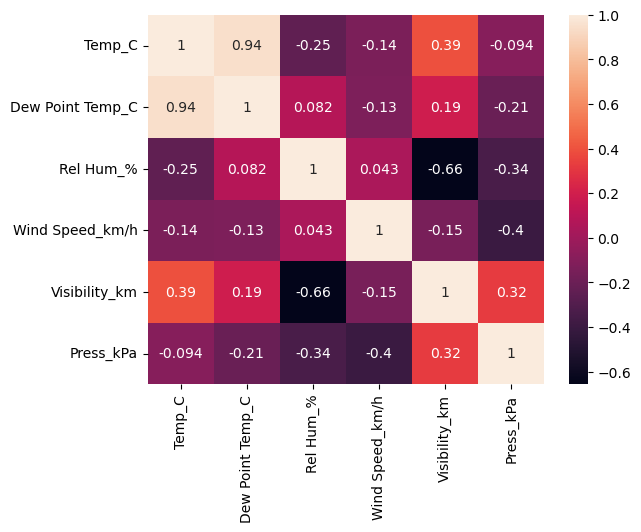

In [39]:
sns.heatmap(cor_matrix,annot=True)

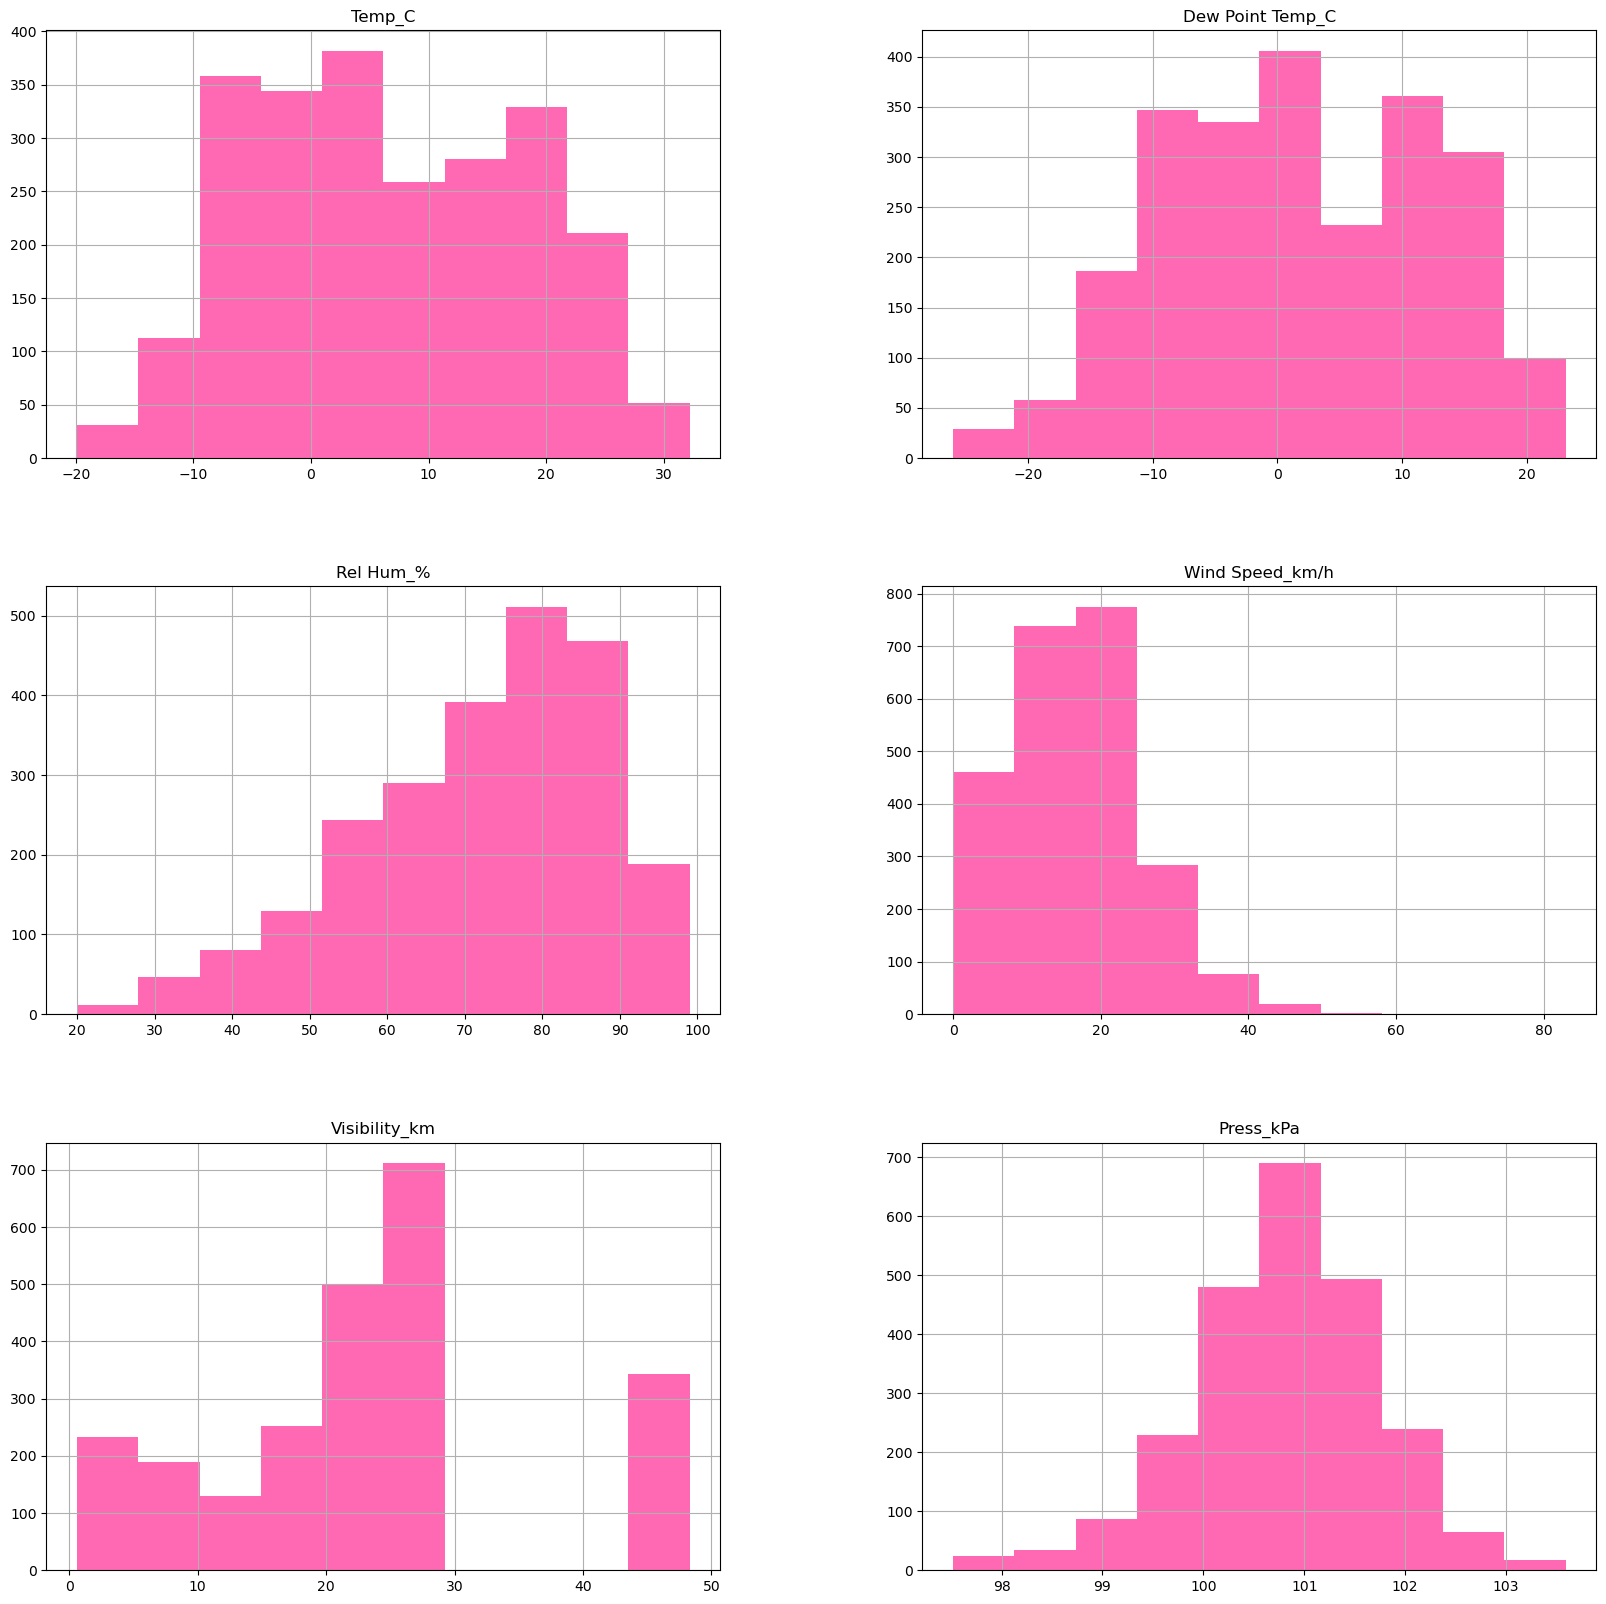

In [40]:
data_hist_plot=weather_df.hist(figsize=(20,20),color="hotpink")

In [41]:
num_cols=weather_df.select_dtypes(exclude=['object']).columns.tolist()
num_cols

['Temp_C',
 'Dew Point Temp_C',
 'Rel Hum_%',
 'Wind Speed_km/h',
 'Visibility_km',
 'Press_kPa']

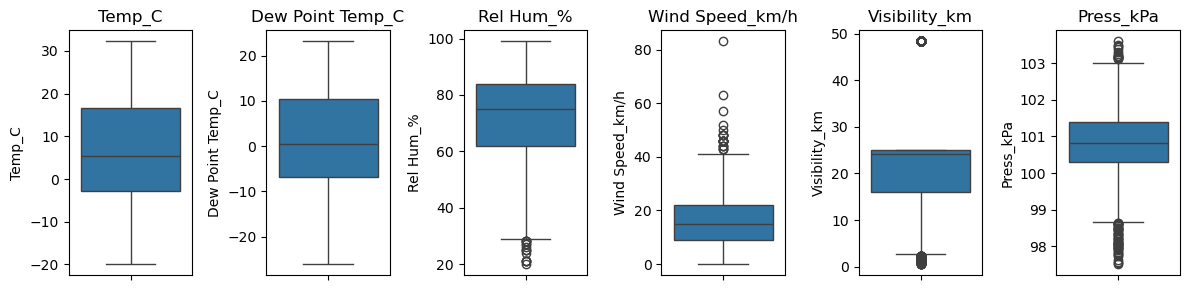

In [42]:
fig,axes=plt.subplots(ncols=6,figsize=(12,3))
for column, axis in zip(num_cols,axes):
    sns.boxplot(data=weather_df[column],ax=axis)
    axis.set_title(column)
plt.tight_layout()
plt.show()

Label Encoding: converting target variable into the numeric

In [43]:
from sklearn.preprocessing import LabelEncoder
label_Encoder=LabelEncoder()

In [44]:
weather_df['Std_Weather']=label_Encoder.fit_transform(weather_df['Std_Weather'])

In [45]:
label_Encoder.classes_

array(['Clear', 'Cloudy', 'RAIN', 'SNOW'], dtype=object)

In [46]:
cat_code=dict(zip(label_Encoder.classes_,label_Encoder.transform(label_Encoder.classes_)))

In [47]:
weather_df.Std_Weather.value_counts()

Std_Weather
2    603
1    600
0    600
3    556
Name: count, dtype: int64

X,y variables

In [48]:
X=weather_df.drop(['Std_Weather'],axis=1)
y=weather_df['Std_Weather']

In [49]:
weather_df.head()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Std_Weather
3352,25.8,6.9,30,15,48.3,101.46,1
5749,26.7,18.4,60,20,24.1,101.03,1
3681,13.1,9.6,79,13,24.1,100.52,1
3932,18.5,16.2,86,19,19.3,100.47,1
8149,1.3,-7.0,54,30,24.1,101.29,1


Feature Scalling:

In [50]:
from sklearn.preprocessing import StandardScaler
std_scaler=StandardScaler()

In [51]:
X_std=std_scaler.fit_transform(X)
X_std

array([[ 1.68088016,  0.50303285, -2.67283747, -0.16497171,  1.9748692 ,
         0.71944497],
       [ 1.76001895,  1.59679375, -0.7778974 ,  0.36595362,  0.06987259,
         0.24972309],
       [ 0.56414391,  0.75982889,  0.42223131, -0.37734185,  0.06987259,
        -0.3073889 ],
       ...,
       [-0.63173114, -0.29588816,  1.30653668,  1.21543415, -1.44940157,
        -0.93004348],
       [-0.60535154, -0.32442105,  1.053878  ,  1.21543415, -1.06367911,
        -0.97373854],
       [-0.58776514, -0.35295394,  0.864384  ,  1.42780429, -0.93772892,
        -0.99558607]])

In [52]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_std,y,test_size=0.2,random_state=42,stratify=y)
X_train.shape,X_test.shape

((1887, 6), (472, 6))

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier


Creating objects of each models

In [54]:
LR=LogisticRegression()
DT=DecisionTreeClassifier()
RF=RandomForestClassifier()
ETC=ExtraTreesClassifier()
SVM=SVC()
KNN=KNeighborsClassifier()
GBC=GradientBoostingClassifier()
ABC=AdaBoostClassifier()
NB=GaussianNB()

In [55]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import cross_val_score
models=[LR,DT,RF,ETC,SVM,KNN,GBC,ABC,NB]
features=X_std
labels=y
CV=5
accu_list=[]
ModelName=[]

for model in models:
    model_name=model.__class__.__name__
    accuracies=cross_val_score(model,features,labels,scoring='accuracy',cv=CV)
    accu_list.append(accuracies.mean()*100)
    ModelName.append(model_name)
    
model_acc_df=pd.DataFrame({"Model":ModelName,"Cross_Val_Accuracy":accu_list})
model_acc_df

,Model,Cross_Val_Accuracy
0,LogisticRegression,59.816204
1,DecisionTreeClassifier,54.941074
2,RandomForestClassifier,63.079906
3,ExtraTreesClassifier,61.808899
4,SVC,59.986415
5,KNeighborsClassifier,56.001026
6,GradientBoostingClassifier,62.656357
7,AdaBoostClassifier,52.226151
8,GaussianNB,59.010040


Model Evaluations

In [56]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

Classification Report

In [57]:
RF.fit(X_train,y_train)
y_pred_rf=RF.predict(X_test)

In [58]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.65      0.71      0.68       120
           1       0.54      0.48      0.51       120
           2       0.75      0.70      0.72       121
           3       0.79      0.85      0.82       111

    accuracy                           0.68       472
   macro avg       0.68      0.69      0.68       472
weighted avg       0.68      0.68      0.68       472



confusion matrix:

<Axes: >

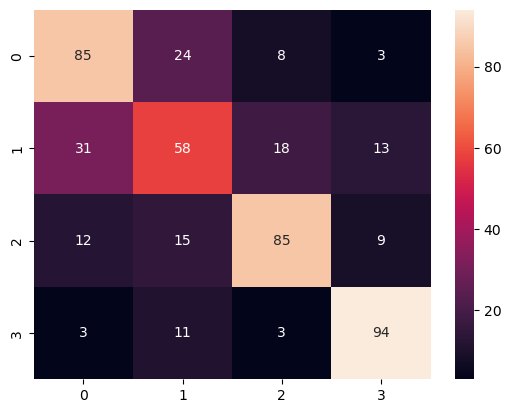

In [59]:
cm=confusion_matrix(y_test,y_pred_rf)
sns.heatmap(cm,annot=True,fmt='d')

hyperparameter tuning: model tuning

In [61]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [62]:
parameters={'n_estimators':[50,100],
            'max_features':['sqrt','log2'],
            'criterion':['ginni','entropy']}

In [63]:
grid_search=GridSearchCV(estimator=RF,param_grid=parameters)

In [64]:
grid_search.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['ginni', 'entropy'],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [50, 100]})

Best hyper parameters

In [65]:
grid_search.best_params_

{'criterion': 'entropy', 'max_features': 'log2', 'n_estimators': 50}

In [66]:
Random_forest_model_new=RandomForestClassifier(criterion='gini',max_features='sqrt',n_estimators=50)

In [67]:
Random_forest_model_new.fit(X_train,y_train)
y_pred_rf=Random_forest_model_new.predict(X_test)
accuracy_score(y_test,y_pred_rf)

0.6673728813559322

In [68]:
weather_df.head()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Std_Weather
3352,25.8,6.9,30,15,48.3,101.46,1
5749,26.7,18.4,60,20,24.1,101.03,1
3681,13.1,9.6,79,13,24.1,100.52,1
3932,18.5,16.2,86,19,19.3,100.47,1
8149,1.3,-7.0,54,30,24.1,101.29,1


In [71]:
Temp=float(input('Enter the Temp_c='))
dpt=float(input("Enter the Dew point Temp_C="))
rh=float(input("Enter the Relative humidity %="))
ws=float(input("Enter the wind speed(km/hr)"))
vs=float(input("Enter the visibility_km="))
pr=float(input("Enter the pressurse kpa="))

In [72]:
input_data=[Temp,dpt,rh,ws,vs,pr]
scaled_data=std_scaler.transform([input_data])
prediction=Random_forest_model_new.predict(scaled_data)
prediction

array([2])

In [73]:
if prediction[0]==0:
    print('Weather is "CLEAR"')
elif prediction[0]==1:
    print('Weather is "CLOUDY"')
elif prediction[0]==2:
    print('Weather is "RAINY"')
else:
    print('Weather is "SNOWY"')

Weather is "RAINY"


WEATHER PREDICTIVE SYSTEM : RANDOM FOREST MODEL:

In [74]:
Temp=float(input('Enter the Temp_c='))
dpt=float(input("Enter the Dew point Temp_C="))
rh=float(input("Enter the Relative humidity %="))
ws=float(input("Enter the wind speed(km/hr)"))
vs=float(input("Enter the visibility_km="))
pr=float(input("Enter the pressurse kpa="))

input_data=[Temp,dpt,rh,ws,vs,pr]
scaled_data=std_scaler.transform([input_data])
prediction=Random_forest_model_new.predict(scaled_data)

print("")
print("**********  WEATHER PREDICTION MACHINE LEARNING MODEL***********")
print("")

if prediction[0]==0:
    print('Weather is "CLEAR"')
elif prediction[0]==1:
    print('Weather is "CLOUDY"')
elif prediction[0]==2:
    print('Weather is "RAINY"')
else:
    print('Weather is "SNOWY"')



**********  WEATHER PREDICTION MACHINE LEARNING MODEL***********

Weather is "RAINY"
